# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('/content/drive/My Drive/titanic_clustering_results.csv')
df.head()

Mounted at /content/drive


,Age,Fare,Sex,Pclass,Embarked,2urvived,Family_Size,Is_Alone,Cluster_DBSCAN
0,-0.581628,-0.503291,0,3,2,0,1,0,-1
1,0.658652,0.734744,1,1,0,1,1,0,-1
2,-0.271558,-0.490240,1,3,2,1,0,1,-1
3,0.426099,0.383183,1,1,2,1,1,0,-1
4,0.426099,-0.487824,0,3,2,0,0,1,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df.drop(columns=['Cluster_DBSCAN'])
y = df['Cluster_DBSCAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())

Training set class distribution:
Cluster_DBSCAN
-1     643
 0     192
 4      59
 2      31
 1      29
 6      22
 7      15
 8      15
 9      11
 3      11
 10     10
 5       9
Name: count, dtype: int64

Testing set class distribution:
Cluster_DBSCAN
-1     161
 0      48
 4      15
 2       8
 1       7
 6       5
 7       4
 8       4
 3       3
 9       3
 5       2
 10      2
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)


Random Forest adalah algoritma ensemble yang menggabungkan banyak decision trees untuk meningkatkan akurasi dan stabilitas prediksi. Algoritma ini menggunakan teknik bagging dan bootstrap sampling untuk melatih setiap pohon pada subset data yang berbeda, lalu menggabungkan hasilnya dengan majority voting untuk klasifikasi. Keunggulannya terletak pada kemampuannya menangani data yang tidak seimbang, mencegah overfitting, dan memberikan akurasi tinggi meskipun data memiliki banyak fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.98
F1-Score: 0.99


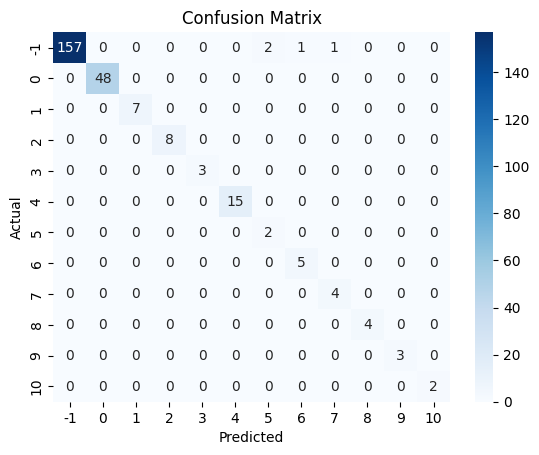


Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       161
           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        15
           5       0.50      1.00      0.67         2
           6       0.83      1.00      0.91         5
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2

    accuracy                           0.98       262
   macro avg       0.93      1.00      0.95       262
weighted avg       0.99      0.98      0.99       262



In [5]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1-score to handle imbalanced classes

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model mencapai akurasi 98% dengan weighted average F1-score sebesar 99%. Sebagian besar kelas memiliki precision, recall, dan F1-score yang sempurna, menunjukkan performa prediksi yang sangat baik. Hanya beberapa kelas kecil, seperti kelas 5 dan 7, yang memiliki precision sedikit lebih rendah.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

#Perbandingan Hasil Evaluasi:

Meskipun tanpa tuning, model menunjukkan performa yang sangat baik dengan akurasi 98% dan weighted average F1-score sebesar 99%.
Identifikasi Kelemahan:

Kelemahan kecil terlihat pada beberapa kelas minoritas, seperti kelas 5 dan 7, yang memiliki nilai precision lebih rendah. Ini mungkin disebabkan oleh jumlah data yang sangat sedikit di kelas tersebut.
Tidak ada indikasi kuat bahwa model mengalami overfitting atau underfitting, karena performanya konsisten di hampir semua kelas.
Rekomendasi Tindakan Lanjutan:

Jika ingin meningkatkan akurasi pada kelas-kelas minoritas, pertimbangkan untuk menambah data pada kelas tersebut atau menggunakan teknik penyeimbangan data seperti SMOTE.
Cobalah algoritma lain atau metode ensemble untuk melihat apakah dapat memberikan perbaikan pada kelas dengan precision rendah, terutama jika performa di kelas minoritas menjadi fokus utama.